<a href="https://colab.research.google.com/github/uditmanav17/CoreySchafer/blob/master/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundametals of ML

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers, losses, metrics, regularizers
from tensorflow.keras.utils import to_categorical

## 4.4 Overfitting vs underfitting


### 4.4.1 Reducing N/w size
There is no magical formula to determine the right number of layers or the right size for each layer. You must evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the
correct model size for your data. The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss. <br>
Let’s try this on the movie-review classification network. The original network is shown next. 


``` Python
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```
Now let’s try to replace it with this smaller network.


``` Python
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```
Smaller model will start overfitting much later.



### 4.4.2 Adding weight regularization
You may be familiar with the principle of Occam’s razor: given two explanations for something, the explanation most likely to be correct is the simplest one—the one that makes fewer assumptions. This idea also applies to the models learned by neural networks: given some training data and a network architecture, multiple sets of weight values (multiple models) could explain the data. Simpler models are less likely to overfit than complex ones.
A simple model in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters, as you saw in the previous section). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is called weight regularization, and it’s done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
* L1 regularization—The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
* L2 regularization—The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization. <br>

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let’s add L2 weight regularization to the movie-review classification network.
```Python
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```
l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time. <br>
As an alternative to L2 regularization, you can use one of the following Keras weight regularizers.
```Python
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)
```


### 4.4.3 Adding Dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, **the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time**. <br>
This technique may seem strange and arbitrary. Why would this help reduce overfitting? Hinton says he was inspired by, among other things, a fraud-prevention mechanism used by banks. In his own words, “I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a differentsubset of neurons on each example would prevent conspiracies and thus reduce overfitting.”1 The core idea is that introducing noise in the output values of a layer canbreak up happenstance patterns that aren’t significant (what Hinton refers to as conspiracies), which the network will start memorizing if no noise is present. <br>
In Keras, you can introduce dropout in a network via the Dropout layer, which is
applied to the output of the layer right before it:
```Python
model.add(layers.Dropout(0.5))
```
Let’s add two Dropout layers in the IMDB network to see how well they do at reducing overfitting.
```Python
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
```
It will clearly reduce overfitting.

### Recap
To recap, these are the most common ways to prevent overfitting in neural networks:
* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

In [2]:
# try bringing it all together
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data[0])
print(len(train_data[0]))
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
1


In [4]:
# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [0]:
# validating your approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
model = models.Sequential()
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 80,089
Trainable params: 80,089
Non-trainable params: 0
_________________________________________________________________


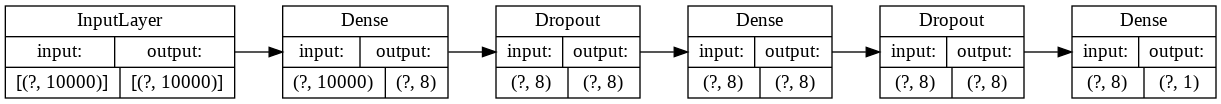

In [7]:
tf.keras.utils.plot_model(
    model, 
    # to_file='model.png', 
    show_shapes=True, 
    show_layer_names=False,
    rankdir='LR', # LR TB
    expand_nested=True, 
    dpi=96
)

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

In [9]:
# training with train and validation data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6803 - binary_accuracy: 0.5802 - val_loss: 0.5991 - val_binary_accuracy: 0.7802
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6039 - binary_accuracy: 0.6925 - val_loss: 0.5297 - val_binary_accuracy: 0.8458
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5604 - binary_accuracy: 0.7414 - val_loss: 0.4837 - val_binary_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5230 - binary_accuracy: 0.7899 - val_loss: 0.4455 - val_binary_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4929 - binary_accuracy: 0.8243 - val_loss: 0.4317 - val_binary_accuracy: 0.8671
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4706 - binary_accuracy: 0.8446 - val_loss: 0.4049 - val_binary_accuracy: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - los

In [10]:
print(history)
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


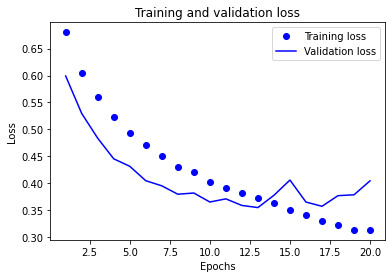

In [11]:
# plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

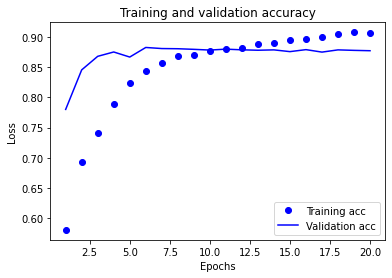

In [12]:
# plotting training and validation accuracy
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.4121 - binary_accuracy: 0.8720
[0.4121297001838684, 0.8720399737358093]


In [14]:
preds = model.predict(x_test)
print(preds)


[[0.21057612]
 [0.9999994 ]
 [0.99995   ]
 ...
 [0.14362246]
 [0.14522246]
 [0.8674335 ]]


In [15]:
final_preds = preds > .5
final_preds

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [16]:
final_preds.reshape((1, 25000))

array([[False,  True,  True, ..., False, False,  True]])

In [17]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [18]:
tf.math.confusion_matrix(y_test, final_preds)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10571,  1929],
       [ 1270, 11230]], dtype=int32)>

In [19]:
tf.math.confusion_matrix(y_test, final_preds)  # 13 epoches

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10571,  1929],
       [ 1270, 11230]], dtype=int32)>